## Base de dados mnist
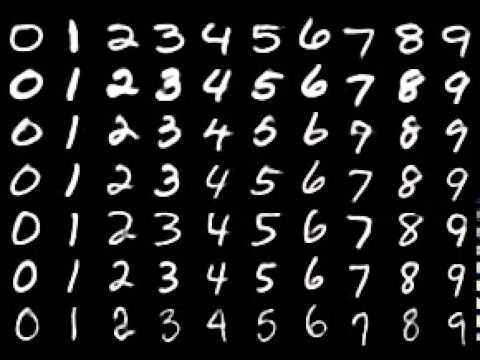

###### Importações

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Input, Dense

###### Base de dados e conversões

In [2]:
# Obs: Não utilizaremos a classe pois apenas comparar as imagens codificadas com as reconstruidas
(previsores_treinamento, _), (previsores_teste, _) = mnist.load_data()

In [3]:
# Conversões (para aceleramento do processamento)
previsores_treinamento = previsores_treinamento.astype('float32') / 255
previsores_teste = previsores_teste.astype('float32') / 255

###### Redimensionamento das imagens

In [4]:
previsores_treinamento = previsores_treinamento.reshape((len(previsores_treinamento), np.prod(previsores_treinamento.shape[1:])))
previsores_treinamento

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
previsores_teste = previsores_teste.reshape((len(previsores_teste), np.prod(previsores_teste.shape[1:])))
previsores_teste

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Autoencoder para dimensionamento de imagens
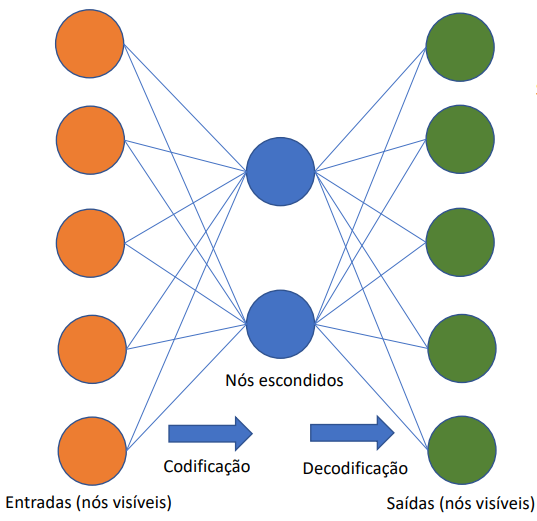

Parâmetros da rede neural artificial:

    Dense - Todos os neurônios conectados
    units - Quantidade de neurônios
    activation - Função de ativação que será inserida
    input_dim - número total de entradas
    
Parâmetros do otimizador:

    optimizer - descida do gradiente e descida do gradiente estocástica (adam é uma otimização do estocástica)
    loss - Função de perda (binary_crossentropy pois só há uma saída)
    metrics - Métrica de avaliação (obs - pode ser colocado mais de um)

In [6]:
autoencoder = Sequential()
# Camada de entrada
autoencoder.add(Dense(units = 32, activation = 'relu', input_dim = 784))
# Camada de saida
autoencoder.add(Dense(units = 784, activation = 'sigmoid'))
# Compilação
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
# Estrutura da rede neural
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Obs: 784 (neuronios na camada de entrada) + 32 (neuronios da camada de saida) e + 32 (bias) = 25120

###### Treinamento do Autoenconder
    X - Atributos previsores
    y - Atributos da classe (porém nós devemos comparar por si mesmo já que os dados apenas são redimensionados)
    epochs - número das épocas
    batch_size - 
    validation_data - dados de validação (mesma coisa, devemos comparar 'eles por eles')

In [8]:
autoencoder.fit(previsores_treinamento, previsores_treinamento,
                epochs = 50, batch_size = 256, 
                validation_data = (previsores_teste, previsores_teste))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
231/235 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.0129WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000000944044EDC8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - accuracy: 0.0117 - val_loss: 0.0915 - val_accuracy: 0.0128
Epoch 45/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - accuracy: 0.0115 - val_loss: 0.0914 - val_accuracy: 0.0123
Epoch 46/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - accuracy: 0.0114 - val_loss: 0.0915 - val_accuracy: 0.0131
Epoch 47/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - accuracy: 0.0113 - val_loss: 0.0914 - val_accuracy: 0.0116
Epoch 48/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0926 - accuracy: 0.0117 - val_loss: 0.0915 - val_accuracy: 0.0131
Epoch 49/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0926 - accuracy: 0.0114 - val_loss: 0.0915 - val_accuracy: 0.0118
Epoch 50/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0925 - accuracy: 0.0117 - val_loss: 0.0914 - val_accuracy: 0.0125


###### Codificação e decodificação

In [9]:
# camada de entrada
dimensao_original = Input(shape=(784,))
camada_encoder = autoencoder.layers[0]

In [10]:
encoder = Model(dimensao_original, camada_encoder(dimensao_original))
encoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [12]:
imagens_codificadas = encoder.predict(previsores_teste)
imagens_decodificadas = autoencoder.predict(previsores_teste)

###### Observação da imagem original, codificada e reconstruída

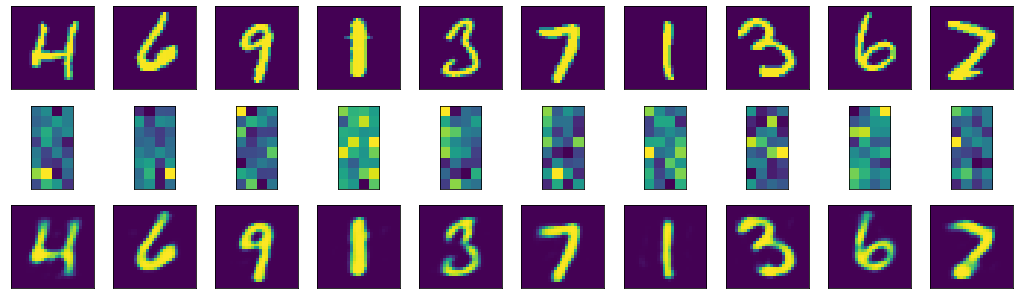

In [13]:
numero_imagens = 10
imagens_teste = np.random.randint(previsores_teste.shape[0], size = numero_imagens)
plt.figure(figsize=(18,18))
for i, indice_imagem in enumerate(imagens_teste):   
    # imagem original
    eixo = plt.subplot(10,10,i + 1)
    plt.imshow(previsores_teste[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
    
    # imagem codificada
    eixo = plt.subplot(10,10,i + 1 + numero_imagens)
    plt.imshow(imagens_codificadas[indice_imagem].reshape(8,4))
    plt.xticks(())
    plt.yticks(())
    
     # imagem reconstruída
    eixo = plt.subplot(10,10,i + 1 + numero_imagens * 2)
    plt.imshow(imagens_decodificadas[indice_imagem].reshape(28,28))
    plt.xticks(())
    plt.yticks(())

Com isso podemos observar que a imagem original e a imagem reconstruída ficam um pouco diferentes, porém a reconstrução das imagens ficaram bastantes interessantes mesmo com poucas épocas, claro que, caso aumentarmos as épocas do treinamento o resultado será bem melhor.